In [0]:
#Mounting gdrive if working on gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Loading Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns   
import itertools
import time
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Reading dataset
LoanData = pd.read_csv('/content/gdrive/My Drive/Datasets/LendingData/loan.csv')
LoanData.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,...,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,...,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,...,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,985xx,WA,16.74,0.0,Feb-2006,0.0,NaN,NaN,10.0,0.0,5468,78.1,13.0,w,3831.93,3831.93,286.71,286.71,...,0.0,0.0,385183.0,36151.0,5000.0,44984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,212xx,MD,26.35,0.0,Dec-2000,0.0,NaN,NaN,12.0,0.0,829,3.6,26.0,w,29339.02,29339.02,1423.21,1423.21,...,0.0,0.0,157548.0,29674.0,9300.0,32332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Shape of original Dataset
LoanData.shape

(2260668, 145)

In [0]:
#145 columns, 105 are float, 4 int and 36 object in original Dataset
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [0]:
#Column List
list(LoanData.columns) 

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [0]:
# Dropping other loan status data for now and just keeping "Fully Paid" and "Charged Off"
LoanData.drop(LoanData.index[LoanData['loan_status'] == "Current"], inplace = True)
LoanData.drop(LoanData.index[LoanData['loan_status'] == "Late (31-120 days)"], inplace = True)
LoanData.drop(LoanData.index[LoanData['loan_status'] == "In Grace Period"], inplace = True)
LoanData.drop(LoanData.index[LoanData['loan_status'] == "Late (16-30 days)"], inplace = True)
LoanData.drop(LoanData.index[LoanData['loan_status'] == "Does not meet the credit policy. Status:Fully Paid"], inplace = True)
LoanData.drop(LoanData.index[LoanData['loan_status'] == "Does not meet the credit policy. Status:Charged Off"], inplace = True)
LoanData.drop(LoanData.index[LoanData['loan_status'] == "Default"], inplace = True)

LoanData.shape

(1303607, 145)

In [0]:
#Checking features with more than 90 percent of nulls
LoanData_nulls = pd.DataFrame({'Count': LoanData.isnull().sum(), 'Percent': round(100*LoanData.isnull().sum()/len(LoanData),2)})
LoanData_nulls[LoanData_nulls['Percent'] > 90]

,Count,Percent
id,1303607,100.00
member_id,1303607,100.00
url,1303607,100.00
desc,1180280,90.54
next_pymnt_d,1303607,100.00
annual_inc_joint,1280370,98.22
dti_joint,1280372,98.22
verification_status_joint,1280516,98.23
revol_bal_joint,1287097,98.73
sec_app_earliest_cr_line,1287096,98.73


### 39 Features listed above with more than 90% null values are not useful for us from classification perspective. Hence "Hardship", "Secondary Applicant", "Settlement", "id", "url", "desc" and "member_id" type columns are removed.

If we have more values for these 38 features we could use them well but for now we will be dropping them.

In [0]:
#Dropping columns with more than 90% of data as nulls i.e. 38 features
LoanData_new = LoanData.copy()
LoanData_new = LoanData_new.drop(['id', 'member_id', 'url', 'desc', 'next_pymnt_d', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term'], axis = 1) 

In [0]:
#dropping NA values
LoanData_new.dropna(inplace=True)

In [0]:
#New dataframe after dropping 38 features
LoanData_new.shape

(8594, 106)

In [0]:
#Dataset description
LoanData_new.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8.594000e+03,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.0,8594.0,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.0,8594.000000,8594.000000,8.594000e+03,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,...,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.00000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8594.000000,8.594000e+03,8594.000000,8594.000000,8.594000e+03
mean,13372.137538,13372.137538,13366.046079,14.450511,421.810610,8.500759e+04,17.929962,0.599372,0.861880,39.113451,61.314987,12.544450,1.379916,10017.592972,42.709902,29.358273,0.0,0.0,12769.008964,12762.989716,10540.615896,1952.133468,2.255104,274.004478,47.710846,6129.909017,0.027810,49.706656,1.0,0.012334,927.640098,1.365551e+05,1.429835,3.071678,1.084594,2.265185,13.315918,40558.081918,75.219688,2.006516,...,1.729695,1.682686,3.468583,6.707819,12486.355364,7428.116593,51.775867,0.019316,60.603095,136.383291,207.196416,9.257389,5.31266,1.737724,18.084012,50.597161,5.376193,46.782523,2.400047,3.394461,5.561322,4.384571,9.158134,10.161159,8.821969,17.136956,5.586688,12.450547,0.002909,0.004422,0.225855,3.230742,85.073412,34.347394,0.595066,0.426577,1.671754e+05,50776.813009,14030.418315,4.936878e+04
std,8366.921318,8366.921318,8364.607019,5.046764,265.423537,5.875357e+04,8.545164,1.337046,1.031622,22.958471,23.995767,5.390419,0.981890,14496.661412,21.700237,11.709168,0.0,0.0,9329.942037,9326.892988,8261.502445,2062.286888,12.893159,974.466422,172.400808,7030.854052,0.177375,22.010766,0.0,0.120461,3799.577102,1.487882e+05,1.371103,2.729725,1.117214,1.852863,16.029057,42327.836375,21.595552,1.932578,...,2.101993,2.791604,3.154282,3.878693,14971.096759,9537.084412,27.617824,0.155878,1634.706605,48.744822,89.795666,12.419341,4.75807,1.795842,25.966918,23.122359,5.061530,23.917150,2.183767,2.028792,3.174145,2.521362,4.637570,7.806261,4.708884,8.377316,3.187859,5.383484,0.055979,0.068084,0.812779,2.318657,9.983180,34.206229,0.650920,1.007372,1.627104e+05,45680.973892,12720.863782,4.434983e+04
min,1000.000000,1000.000000,1000.000000,5.320000,31.880000,1.200000e+04,-1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,6.000000,0.0,0.0,102.270000,102.270000,65.890000,0.000

Exploratory Data Analysis

In [0]:
#Splitting Loan issue_d in month and year for EDA
LoanData_new[['issue_M','issue_Y']] = LoanData_new.issue_d.str.split("-",expand=True) 

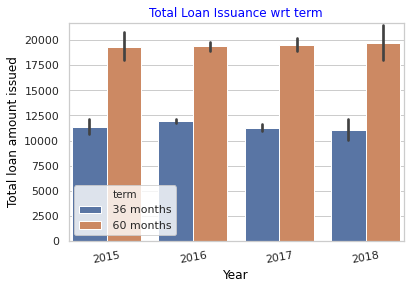

In [0]:
#1. Total Loan Issuance
sns.set(style="whitegrid")
sns.barplot(x=LoanData_new["issue_Y"], y=LoanData_new["loan_amnt"],hue = LoanData_new["term"])
plt.xlabel('Year', color = 'black', horizontalalignment='center')
plt.ylabel('Total loan amount issued', color = 'black', horizontalalignment='center')
plt.title('Total Loan Issuance wrt term', color = 'blue', horizontalalignment='center')
plt.xticks(rotation=10)
plt.margins(0.01)

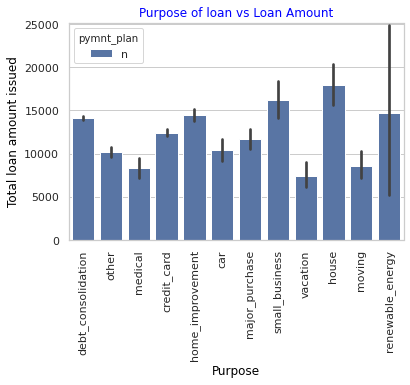

In [0]:
#2. Purpose of loan vs Loan Amount
sns.set(style="whitegrid")
sns.barplot(x=LoanData_new["purpose"], y=LoanData_new["loan_amnt"], hue= LoanData_new["pymnt_plan"])
plt.xlabel('Purpose', color = 'black', horizontalalignment='center')
plt.ylabel('Total loan amount issued', color = 'black', horizontalalignment='center')
plt.title('Purpose of loan vs Loan Amount', color = 'blue', horizontalalignment='center')
plt.xticks(rotation=90)
plt.margins(0.01)

Text(0.5, 1.0, 'Distribution of Loan Status')

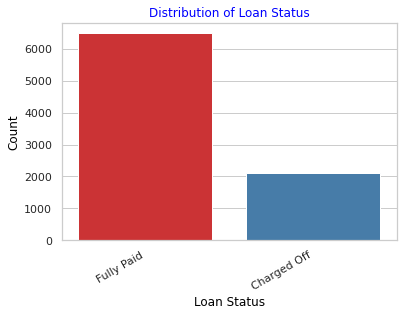

In [0]:
#3. Loan Status Evaluation
plot1 = sns.barplot(LoanData_new.loan_status.value_counts().index, LoanData_new.loan_status.value_counts(), palette = 'Set1')
plt.xticks(rotation = 30, horizontalalignment='right')
plt.xlabel('Loan Status', color = 'black', horizontalalignment='center')
plt.ylabel('Count', color = 'black', horizontalalignment='center')
plt.title("Distribution of Loan Status", color = 'blue', horizontalalignment='center')

# total = len(LoanData_new)
# sizes = []
# for p in plot1.patches:
#   height = p.get_height()
#   sizes.append(height)
#   plot1.text(p.get_x() + p.get_width()/2.,
#              height + 10000,
#              '{:1.3f}%'.format(height/total*100),
#              ha = "center",
#              fontsize = 10) 

In [0]:
# LoanData_new.all()
# sns.catplot(x=LoanData_new["loan_status"], y=LoanData_new["loan_status"].value_counts(), hue="grade", kind="box", data=LoanData_new);
# LoanData_new["loan_status"].value_counts()

Text(0.5, 1.0, 'Interest Rate Distribution')

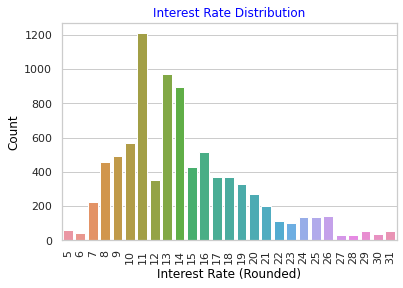

In [0]:
#4. Interest Rates
sns.countplot(round(LoanData_new.int_rate, 0).astype(int))
plt.xticks(rotation = 90, horizontalalignment='center')
plt.xlabel('Interest Rate (Rounded)', color = 'black', horizontalalignment='center')
plt.ylabel('Count', color = 'black', horizontalalignment='center')
plt.title('Interest Rate Distribution', color = 'blue', horizontalalignment='center')

In [0]:
#5. Colormap of people with common profession and their loan grading
CommonProfession = LoanData_new.emp_title.value_counts()[:30].index.values 
cMap = sns.light_palette("red", as_cmap=True)
round(pd.crosstab(LoanData_new[LoanData_new['emp_title'].isin(CommonProfession)]['emp_title'], 
                  LoanData_new[LoanData_new['emp_title'].isin(CommonProfession)]['grade'], 
                  normalize='index') * 100,2).style.background_gradient(cmap = cMap)

grade,A,B,C,D,E,F,G
emp_title,,,,,,,
Account Manager,0.000000,26.090000,56.520000,8.700000,0.000000,4.350000,4.350000
Administrative Assistant,6.670000,23.330000,46.670000,16.670000,6.670000,0.000000,0.000000
Controller,4.170000,33.330000,29.170000,16.670000,16.670000,0.000000,0.000000
Director,8.700000,41.300000,34.780000,8.700000,6.520000,0.000000,0.000000
Driver,2.990000,37.310000,35.820000,19.400000,4.480000,0.000000,0.000000
Engineer,10.340000,27.590000,34.480000,24.140000,0.000000,3.450000,0.000000
Executive Assistant,0.000000,36.360000,36.360000,18.180000,4.550000,4.550000,0.000000
General Manager,0.000000,35.710000,30.950000,21.430000,9.520000,0.000000,2.380000
Manager,4.950000,29.670000,36.260000,15.930000,8.240000,3.850000,1.100000


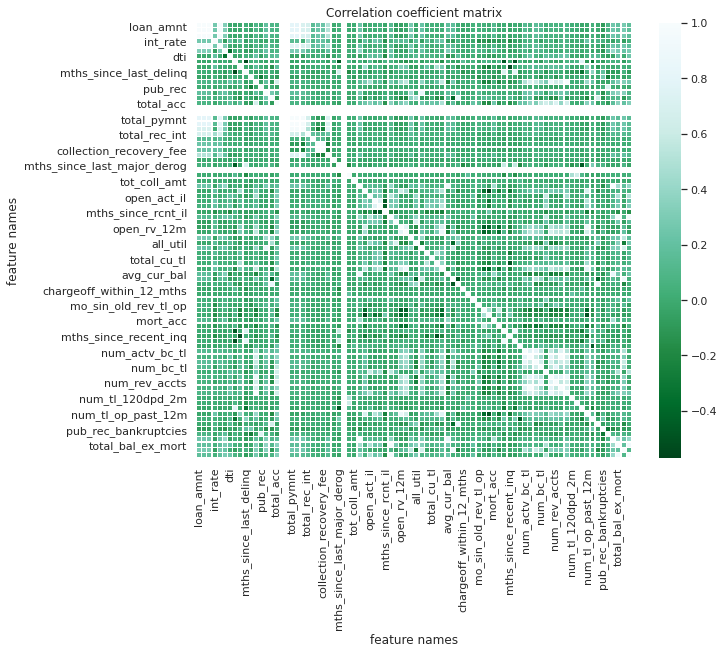

In [0]:
#6. CorrPlot for numerical features
numerical_feature_name = LoanData_new.columns[(LoanData_new.dtypes == "float64") | (LoanData_new.dtypes == "int64")].tolist()
corrmat = LoanData_new[numerical_feature_name].corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, square=True, ax=ax, cmap="BuGn_r", linewidths=0.2)
ax.set_title("Correlation coefficient matrix")
ax.set_xlabel("feature names")
ax.set_ylabel("feature names")
plt.show()

Text(0.5, 1.0, 'Distribution of customers statewise')

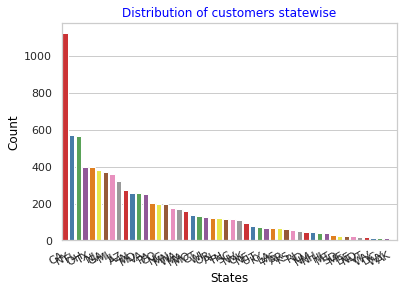

In [0]:
#7. Bar plot looking at States taking most loans ----- Make clear
plot1 = sns.barplot(LoanData_new.addr_state.value_counts().index, LoanData_new.addr_state.value_counts(), palette = 'Set1')
plt.xticks(rotation = 30, horizontalalignment='right')
plt.xlabel('States', color = 'black', horizontalalignment='center')
plt.ylabel('Count', color = 'black', horizontalalignment='center')
plt.title("Distribution of customers statewise", color = 'blue', horizontalalignment='center')

# total = len(LoanData_new)
# sizes = []
# for p in plot1.patches:
#   height = p.get_height()
#   sizes.append(height)
#   plot1.text(p.get_x() + p.get_width()/2.,
#              height + 10000,
#              '{:1.3f}%'.format(height/total*100),
#              ha = "center",
#              fontsize = 10)

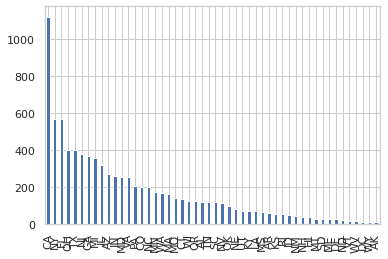

In [0]:
LoanData_new["addr_state"].value_counts().plot(kind='bar')

Modelling

In [0]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.model_selection import cross_val_score

In [0]:
#Remove factor columns with single value
lst = []
for i in LoanData_new.columns:
  if (LoanData_new[i].nunique() == 1):
    lst.append(i)

print(lst)

#dropping those columns
LoanData_new = LoanData_new.drop([i for i in lst], axis = 1) 
LoanData_new = LoanData_new.drop(['issue_M','issue_Y'], axis = 1) 

['pymnt_plan', 'out_prncp', 'out_prncp_inv', 'policy_code', 'hardship_flag']


In [0]:
#Dropping some more features from domain knowledge
# LoanData_new = LoanData_new.drop(['emp_title', 'title', 'zip_code', 'home_ownership', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d',  'pymnt_plan','last_credit_pull_d','hardship_flag', 'disbursement_method', 'debt_settlement_flag','issue_M','issue_Y'], axis = 1) 
LoanData_new = LoanData_new.drop(['emp_title','issue_d','zip_code','earliest_cr_line','last_pymnt_d','last_credit_pull_d'], axis = 1) 

In [0]:
#New dataframe after dropping
LoanData_new.shape

(8594, 95)

We are interested in predicting whether the loan will end up in "Good" ("Fully Paid") or "Bad" ("Default" or "Charged Off") status.

In [0]:
# Calculate Good and Bad Loan Status Ratio
good_loan =  len(LoanData_new[(LoanData_new.loan_status == 'Fully Paid')])
bad_loan =  len(LoanData_new[(LoanData_new.loan_status == 'Charged Off') | (LoanData_new.loan_status == 'Default')])
print ('Good Loan Ratio: %.2f%%'  % (good_loan/len(LoanData_new)*100))
print ('Bad Loan Ratio: %.2f%%'  % (bad_loan/len(LoanData_new)*100))

Good Loan Ratio: 75.58%
Bad Loan Ratio: 24.42%


In [0]:
#Copying into new dataframe before dropping other loan status
LoanData_GB = LoanData_new.copy()

In [0]:
# Dropping other loan status data for now
# LoanData_GB.drop(LoanData_GB.index[LoanData_GB['loan_status'] == "Current"], inplace = True)
# LoanData_GB.drop(LoanData_GB.index[LoanData_GB['loan_status'] == "Late (31-120 days)"], inplace = True)
# LoanData_GB.drop(LoanData_GB.index[LoanData_GB['loan_status'] == "In Grace Period"], inplace = True)
# LoanData_GB.drop(LoanData_GB.index[LoanData_GB['loan_status'] == "Late (16-30 days)"], inplace = True)
# LoanData_GB.drop(LoanData_GB.index[LoanData_GB['loan_status'] == "Does not meet the credit policy. Status:Fully Paid"], inplace = True)
# LoanData_GB.drop(LoanData_GB.index[LoanData_GB['loan_status'] == "Does not meet the credit policy. Status:Charged Off"], inplace = True)

LoanData_GB.shape

(8594, 95)

In [0]:
#Categorical Columns
LoanData_GB.select_dtypes(exclude=['int', 'float']).columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'title', 'addr_state',
       'initial_list_status', 'application_type', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')

In [0]:
# Hot encode some categorical features 
columns = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'title', 'addr_state',
       'initial_list_status', 'application_type', 'disbursement_method',
       'debt_settlement_flag']

for col in columns:
    tmp_df = pd.get_dummies(LoanData_GB[col], prefix=col)
    LoanData_GB = pd.concat((LoanData_GB, tmp_df), axis=1)

In [0]:
# create an bad/good loan indicator feature
LoanData_GB['good_loan'] = np.where((LoanData_GB.loan_status == 'Fully Paid'), 1, 0)

Text(0, 0.5, 'Interest Rate (%)')

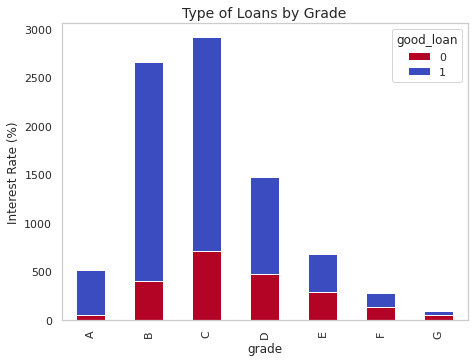

In [0]:
#EDA to see good and bad loan wrt grade and subgrade
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
cmap = plt.cm.coolwarm_r

loans_by_region = LoanData_GB.groupby(['grade', 'good_loan']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)
ax1.set_ylabel('Interest Rate (%)', fontsize=12)

In [0]:
# drop attributes that we hot-encoded and our response variable
LoanData_GB.drop(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'title', 'addr_state',
       'initial_list_status', 'application_type', 'disbursement_method',
       'debt_settlement_flag','loan_status'], axis=1, inplace=True)

In [0]:
LoanData_GB.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq',
       ...
       'addr_state_WY', 'initial_list_status_f', 'initial_list_status_w',
       'application_type_Individual', 'application_type_Joint App',
       'disbursement_method_Cash', 'disbursement_method_DirectPay',
       'debt_settlement_flag_N', 'debt_settlement_flag_Y', 'good_loan'],
      dtype='object', length=228)

In [0]:
#Assigning Label
y = LoanData_GB['good_loan']
X = LoanData_GB.drop(['good_loan'],axis = 1)

In [0]:
## Naive Bayes Classifier
model_name=['Naive Bayes Classifier']
models_list= [NB()]
for i, j in zip(model_name, models_list):
    scores = cross_val_score(j, X , y, cv=5)
    print(i+" --> "+ "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Naive Bayes Classifier --> Accuracy: 0.91 (+/- 0.02)


In [0]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=44)

In [0]:
#Best Subset Selection
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [0]:
def getBest(k):
    tic = time.time()
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    # Return the best model, along with some other useful information about the model
    return best_model

In [0]:
print(getBest(19)["model"].summary())

In [0]:
# # Could take quite awhile to complete...
# models_best = pd.DataFrame(columns=["RSS", "model"])

# tic = time.time()
# for i in range(1,8):
#     models_best.loc[i] = getBest(i)

# toc = time.time()
# print("Total elapsed time:", (toc-tic), "seconds.")

Processed 227 models on 1 predictors in 0.6647875308990479 seconds.
Processed 25651 models on 2 predictors in 130.39920806884766 seconds.


In [0]:
print(models_best.loc[2, "model"].summary())

NameError: ignored